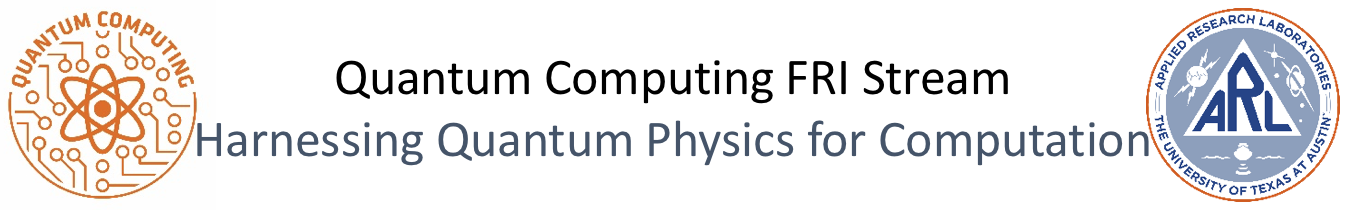

# Stabilizers for Error Correction
## Lesson 18

### Installations and Imports

In [ ]:
#In case you don't have qiskit, install it now
%pip install qiskit --quiet
%pip install qiskit-aer --quiet
#Installing/upgrading pylatexenc seems to have fixed my mpl issue
#If you try this and it doesn't work, try also restarting the runtime/kernel
%pip install pylatexenc --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
#Let's go ahead and import all this stuff too
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [ ]:
from qiskit.circuit import Gate

## Today's Objectives

Please help: Al Borland is the best stabilizer meme I could find.

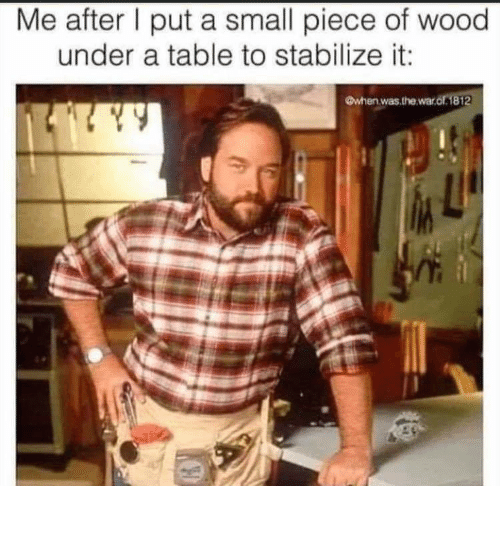

 - Better understand stabilizers and how they relate to syndrome measurement and error correction
  - Measure a syndrome (or another observable) without disturbing the state
  - Build an error correction scheme from a stabilizer group

## Stabilizers??

The **stabilizers** of an error-correcting code are operators that commute with the encoded states (and their action will not change the logical state).

They contain all the important information about a code, and their simultaneous +1 eigenspace is what we call the **codespace**.

## Stabilizer Groups

A __stabilizer group__ is a set $S$ of operators such that
- Multiplying any two elements of $S$ gives another element in $S$
- $S$ does not contain the negative identity $-\mathbf{I}$
- $S$ is made up of tensor products of the Pauli operators $\mathbf{I},\mathbf{X},\mathbf{Y},\mathbf{Z}$

### Example: The Bit-flip Code

$$S= \left\{\mathbf{I},\;\mathbf{Z}_{0}\mathbf{Z}_{1},\;\mathbf{Z}_{0}\mathbf{Z}_{2},\;\mathbf{Z}_{1}\mathbf{Z}_{2} \right\} $$

$$\left(\mathbf{Z}_{0}\mathbf{Z}_{1}\right)\cdot\left(\mathbf{Z}_{0}\mathbf{Z}_{1}\right)=\left(\mathbf{Z}_{0}\mathbf{Z}_{0}\right)\cdot\left(\mathbf{Z}_{1}\mathbf{Z}_{1}\right)=\mathbf{I}$$

$$\left(\mathbf{Z}_{0}\mathbf{Z}_{1}\right)\cdot\left(\mathbf{Z}_{0}\mathbf{Z}_{2}\right)=\left(\mathbf{Z}_{0}\mathbf{Z}_{0}\right)\cdot\left(\mathbf{Z}_{1}\mathbf{Z}_{2}\right)=\mathbf{Z}_{1}\mathbf{Z}_{2}$$

## Stabilizer Generators

A __generating set__ $G$ for a stabilizer group $S$ is a subset of $S$ such that every element of $S$ is either in $G$ or is a product of elements of $G$

The generating set gives a minimalist description of a quantum code.

### Example: The Bit-flip Code

$$G= \left\{\mathbf{Z}_{0}\mathbf{Z}_{2},\;\mathbf{Z}_{1}\mathbf{Z}_{2} \right\} $$

$$\left(\mathbf{Z}_{0}\mathbf{Z}_{2}\right)\cdot\left(\mathbf{Z}_{0}\mathbf{Z}_{2}\right)=\left(\mathbf{Z}_{0}\mathbf{Z}_{0}\right)\cdot\left(\mathbf{Z}_{2}\mathbf{Z}_{2}\right)=\mathbf{I}$$

$$\left(\mathbf{Z}_{0}\mathbf{Z}_{2}\right)\cdot\left(\mathbf{Z}_{1}\mathbf{Z}_{2}\right)=\left(\mathbf{Z}_{0}\mathbf{Z}_{1}\right)\cdot\left(\mathbf{Z}_{2}\mathbf{Z}_{2}\right)=\mathbf{Z}_{0}\mathbf{Z}_{1}$$

$$S= \left\{\mathbf{I},\;\mathbf{Z}_{0}\mathbf{Z}_{1},\;\mathbf{Z}_{0}\mathbf{Z}_{2},\;\mathbf{Z}_{1}\mathbf{Z}_{2} \right\} $$

### Example: The 5-Qubit Perfect Code


$$G=\left\{\mathbf{Z}_{1}\mathbf{X}_{2}\mathbf{X}_{3}\mathbf{Z}_{4},\; \mathbf{Z}_{2}\mathbf{X}_{3}\mathbf{X}_{4}\mathbf{Z}_{0},\;
\mathbf{Z}_{3}\mathbf{X}_{4}\mathbf{X}_{0}\mathbf{Z}_{1},\;
\mathbf{Z}_{4}\mathbf{X}_{0}\mathbf{X}_{1}\mathbf{Z}_{2}\right\}$$

### More Stabilizer Properties

Given a generating set $G=\left\{\mathbf{M}_{0},\;\mathbf{M}_{1},\;\ldots,\; \mathbf{M}_{m-1} \right\} $ for a stabilizer group,
- The generators are mutually commuting: $\mathbf{M}_{i}\mathbf{M}_{j}=\mathbf{M}_{j}\mathbf{M}_{i}$
- Each $\mathbf{M}_{i}\in G$ is a Hermitian operator: $\mathbf{M}_{i}=\mathbf{M}_{i}^{\dagger}$
- Each $\mathbf{M}_{i}\in G$ is an involution: $\mathbf{M}_{i}=\mathbf{M}_{i}^{-1}$ (it is its own inverse)

From these properties, it follows that each $\mathbf{M}_{i}$ is _unitary_ with eigenvalues $+1$ and $-1$

$$\begin{align}
\mathbf{M}_{0}=&\mathbf{Z}_{1}\mathbf{X}_{2}\mathbf{X}_{3}\mathbf{Z}_{4} \qquad \mathbf{M}_{0}^{2}=\left(\mathbf{Z}_{1}\mathbf{X}_{2}\mathbf{X}_{3}\mathbf{Z}_{4}\right)\left(\mathbf{Z}_{1}\mathbf{X}_{2}\mathbf{X}_{3}\mathbf{Z}_{4}\right)=\mathbf{I} \\
\mathbf{M}_{1}=&\mathbf{Z}_{2}\mathbf{X}_{3}\mathbf{X}_{4}\mathbf{Z}_{0} \qquad \mathbf{M}_{1}^{2}=\left(\mathbf{Z}_{2}\mathbf{X}_{3}\mathbf{X}_{4}\mathbf{Z}_{0}\right)\left(\mathbf{Z}_{2}\mathbf{X}_{3}\mathbf{X}_{4}\mathbf{Z}_{0}\right)=\mathbf{I} \\
\mathbf{M}_{2}=&\mathbf{Z}_{3}\mathbf{X}_{4}\mathbf{X}_{0}\mathbf{Z}_{1} \qquad \mathbf{M}_{2}^{2}=\left(\mathbf{Z}_{3}\mathbf{X}_{4}\mathbf{X}_{0}\mathbf{Z}_{1}\right)\left(\mathbf{Z}_{3}\mathbf{X}_{4}\mathbf{X}_{0}\mathbf{Z}_{1}\right)=\mathbf{I} \\
\mathbf{M}_{3}=&\mathbf{Z}_{4}\mathbf{X}_{0}\mathbf{X}_{1}\mathbf{Z}_{2} \qquad \mathbf{M}_{3}^{2}=\left(\mathbf{Z}_{4}\mathbf{X}_{0}\mathbf{X}_{1}\mathbf{Z}_{2}\right)\left(\mathbf{Z}_{4}\mathbf{X}_{0}\mathbf{X}_{1}\mathbf{Z}_{2}\right)=\mathbf{I}
\end{align}$$

## Measuring Single-Qubit Observables

### The Direct Method

We are familiar with the following method of measuring observables:

For some observable $\mathbf{P}$

- Find a unitary $\mathbf{U}$ such that $$\mathbf{U}^{\dagger}\mathbf{P}\mathbf{U}=\mathbf{Z}$$

- Apply $\mathbf{U}^{\dagger}$ to the qubit of interest

- Apply a measurement gate to that qubit

- An outcome of $0$ corresponds to eigenvalue $+1$, an outcome of $1$ corresponds to eigenvalue $-1$


/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


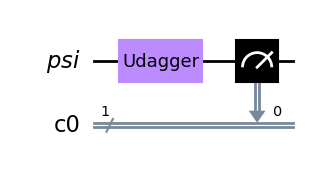

In [ ]:
q,c=QuantumRegister(1,'psi'),ClassicalRegister(1)
qc = QuantumCircuit(q,c)
Udagger = Gate(name='Udagger', num_qubits=1, params=[])
qc.append(Udagger,[q[0]])

qc.measure(q,c)
qc.draw('mpl')

#### Example: Measuring the __X__ Observable

For observable $\mathbf{X}$ which corresponds to the $\{\lvert +\rangle,\lvert -\rangle\}$ basis

$$\mathbf{H}^{\dagger}\mathbf{X}\mathbf{H}=\mathbf{Z}$$

- Apply $\mathbf{H}^{\dagger}=\mathbf{H}$ to the qubit of interest

- Apply a measurement gate to that qubit

- An outcome of $0$ corresponds to eigenvalue $+1$ (the $\lvert +\rangle$ state) , an outcome of $1$ corresponds to eigenvalue $-1$ (the $\lvert -\rangle$ state)


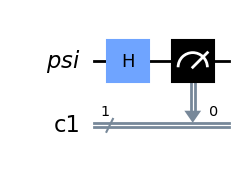

In [ ]:
q,c=QuantumRegister(1,'psi'),ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.h(q[0])

qc.measure(q,c)
qc.draw('mpl')

### The Auxiliary Method - Hadamard Test

We want to measure the observable $\mathbf{P}$. We can do this indirectly using the phase trick by using a superposition to control the application of
$\mathbf{P}$ to our state.

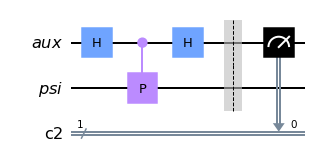

In [ ]:
#This code is to generate a figure demonstrating the above point
aux,q,c=QuantumRegister(1,'aux'),QuantumRegister(1,'psi'),ClassicalRegister(1)
qc = QuantumCircuit(aux,q,c)
qc.h(aux)
qt=QuantumCircuit(1)
qt.z(0) #This is for image purposes only. The z is just to put a gate there
cP=qt.to_gate(label='P').control(1)
qc.append(cP,[aux,q])
qc.h(aux)
qc.barrier()
qc.measure(aux,c)
qc.draw('mpl')

But why does this work?

Recall that we can insert $\mathbf{I}$ anywhere without consequence, and that $\mathbf{U}\mathbf{U}^{\dagger}=\mathbf{U}^{\dagger}\mathbf{U}=\mathbf{I}$

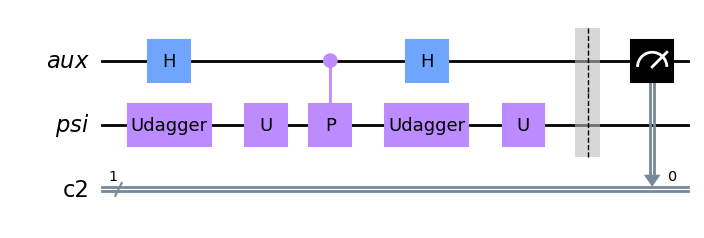

In [ ]:
#This code is to generate a figure demonstrating the above point
aux,q,c=QuantumRegister(1,'aux'),QuantumRegister(1,'psi'),ClassicalRegister(1)
qc = QuantumCircuit(aux,q,c)
qc.h(aux)
Udagger = Gate(name='Udagger', num_qubits=1, params=[])
qc.append(Udagger,[q[0]])
U = Gate(name='U', num_qubits=1, params=[])
qc.append(U,[q[0]])
qt=QuantumCircuit(1)
qt.z(0) #This is for image purposes only. The z is just to put a gate there
cP=qt.to_gate(label='P').control(1)
qc.append(cP,[aux,q])
qc.append(Udagger,[q[0]])
qc.append(U,[q[0]])
qc.h(aux)
qc.barrier()
qc.measure(aux,c)
qc.draw('mpl')

We defined $\mathbf{U}$ such that $$\mathbf{U}^{\dagger}\mathbf{P}\mathbf{U}=\mathbf{Z}$$

So we can group those gates together in the circuit.

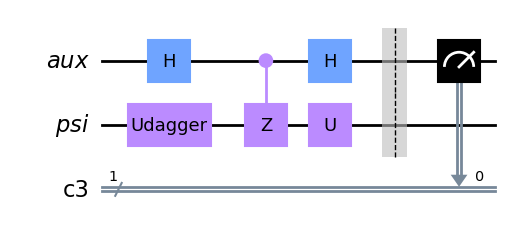

In [ ]:
#This code is to generate a figure demonstrating the above point
aux,q,c=QuantumRegister(1,'aux'),QuantumRegister(1,'psi'),ClassicalRegister(1)
qc = QuantumCircuit(aux,q,c)
qc.h(aux)
Udagger = Gate(name='Udagger', num_qubits=1, params=[])
qc.append(Udagger,[q[0]])
qt=QuantumCircuit(1)
qt.z(0)
cZ=qt.to_gate(label='Z').control(1)
qc.append(cZ,[aux,q])
qc.append(U,[q[0]])
qc.h(aux)
qc.barrier()
qc.measure(aux,c)
qc.draw('mpl')

And we also know the identity that $\mathbf{Z}=\mathbf{H}\mathbf{X}\mathbf{H}$

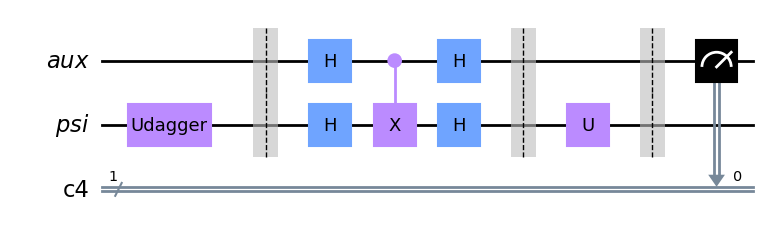

In [ ]:
#This code is to generate a figure demonstrating the above point
aux,q,c=QuantumRegister(1,'aux'),QuantumRegister(1,'psi'),ClassicalRegister(1)
qc = QuantumCircuit(aux,q,c)
Udagger = Gate(name='Udagger', num_qubits=1, params=[])
qc.append(Udagger,[q[0]])
qc.barrier()
qc.h(aux)
qc.h(q)
qt=QuantumCircuit(1)
qt.x(0)
cX=qt.to_gate(label='X').control(1)
qc.append(cX,[aux,q])
qc.h(q)
qc.h(aux)
qc.barrier()
qc.append(U,[q[0]])
qc.barrier()
qc.measure(aux,c)
qc.draw('mpl')

And we notice this pattern to flip a CNOT!

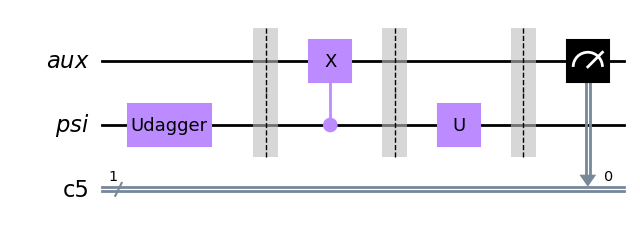

In [ ]:
#This code is to generate a figure demonstrating the above point
aux,q,c=QuantumRegister(1,'aux'),QuantumRegister(1,'psi'),ClassicalRegister(1)
qc = QuantumCircuit(aux,q,c)
Udagger = Gate(name='Udagger', num_qubits=1, params=[])
qc.append(Udagger,[q[0]])
qc.barrier()
qt=QuantumCircuit(1)
qt.x(0)
cX=qt.to_gate(label='X').control(1)
qc.append(cX,[q,aux])
qc.barrier()
qc.append(U,[q[0]])
qc.barrier()
qc.measure(aux,c)
qc.draw('mpl')

So, in effect, we are applying the same gate, $\mathbf{U}^{\dagger}$, to the state as when we measure directly, and then using our auxiliary qubit as a flag.

This procedure is sometimes referred to as the Hadamard test, and it can be used for a general observable $\mathbf{P}$

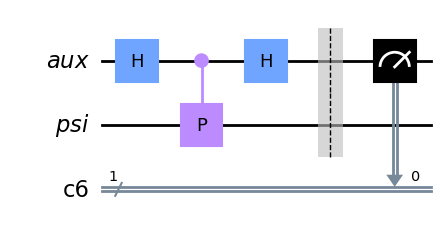

In [ ]:
#This code is to generate a figure demonstrating the above point
aux,q,c=QuantumRegister(1,'aux'),QuantumRegister(1,'psi'),ClassicalRegister(1)
qc = QuantumCircuit(aux,q,c)
qc.h(aux)
qt=QuantumCircuit(1)
qt.z(0) #This is for image generation purposes only. The z is just to put a gate there
cP=qt.to_gate(label='P').control(1)
qc.append(cP,[aux,q])
qc.h(aux)
qc.barrier()
qc.measure(aux,c)
qc.draw('mpl')

## Measuring a Stabilizer Generator

As we have seen in the last lessons and the homework, we diagnose errors by taking syndrome measurements. These syndrome measurements are done using the indirect method (Hadamard test) with the observables given by the stabilizer generators.

### Example: The 5-Qubit Perfect Code

To measure $\mathbf{M}_{0}=\mathbf{Z}_{1}\mathbf{X}_{2}\mathbf{X}_{3}\mathbf{Z}_{4}$ we put the auxiliary qubit into superposition then apply a controlled version of each of the constituent gates.

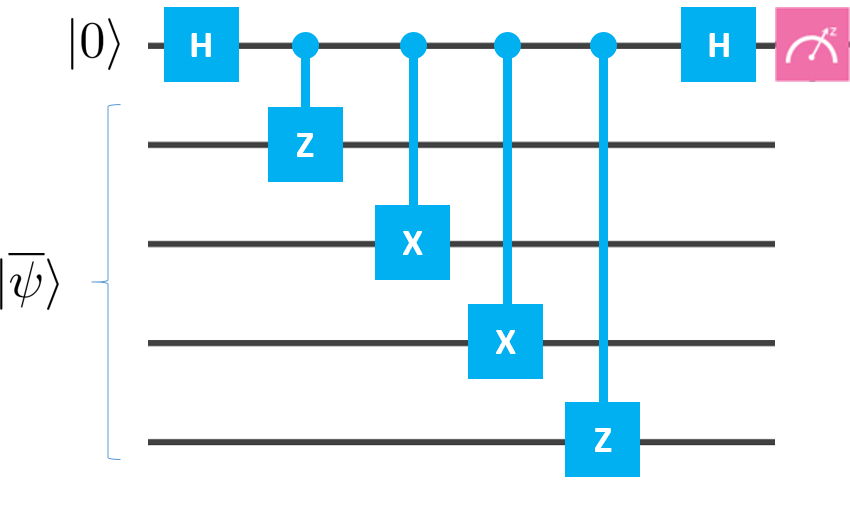

We sometimes represent this as a combined gate to indicate that they all go together.

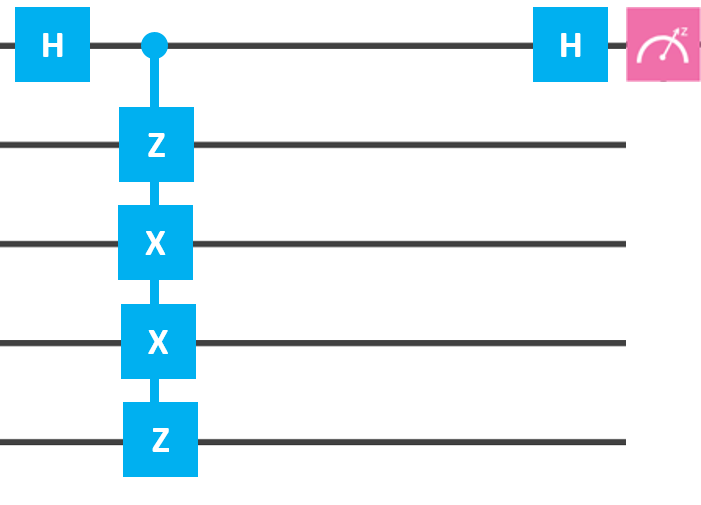

This is how we measure each of the stabilizers. Because all commute, we can measure all the stabilizers simultaneously. Each specific single-qubit Pauli error will be correspond to a unique syndrome.

$$\begin{align}
\mathbf{M}_{0}=&\mathbf{Z}_{1}\mathbf{X}_{2}\mathbf{X}_{3}\mathbf{Z}_{4} \\
\mathbf{M}_{1}=&\mathbf{Z}_{2}\mathbf{X}_{3}\mathbf{X}_{4}\mathbf{Z}_{0} \\
\mathbf{M}_{2}=&\mathbf{Z}_{3}\mathbf{X}_{4}\mathbf{X}_{0}\mathbf{Z}_{1} \\
\mathbf{M}_{3}=&\mathbf{Z}_{4}\mathbf{X}_{0}\mathbf{X}_{1}\mathbf{Z}_{2} \\
\end{align}$$

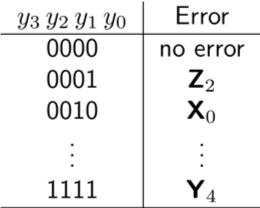

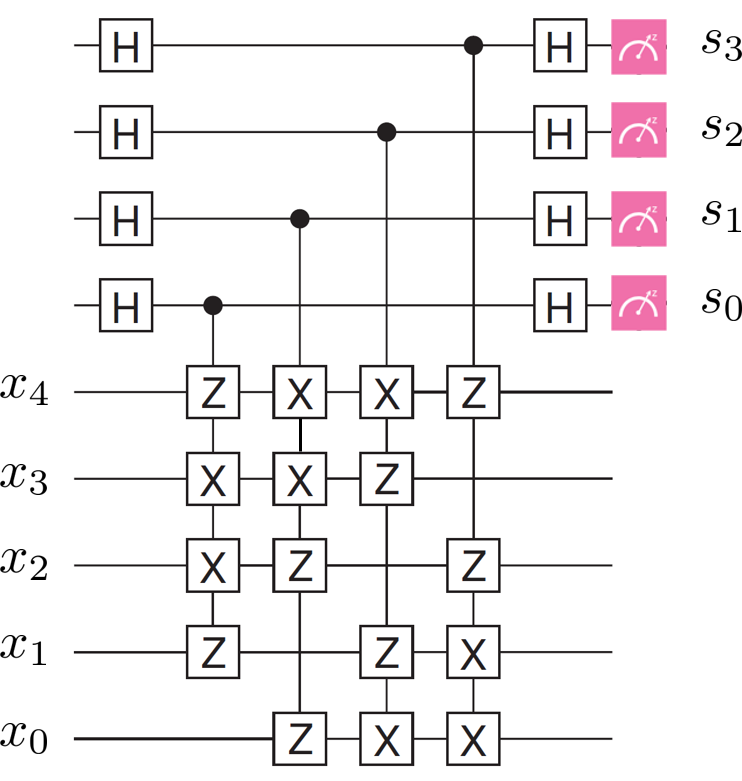

**Bonus Exercise: picture uploaded as second file in canvas**

